# Training my Bird Call Classifier in the cloud

### Many things are different - directory structure, tensorflow imports, calls to functions that draw graphs.

In [0]:
import pandas as pd

In [0]:
def append_ext(fn):
    fn2=fn.split('.')[0]
    return fn2+".jpg"

def append_ext2(fn):
    fn2=fn.split('.')[0]
    return fn2+"2.jpg"

def append_ext3(fn):
    fn2=fn.split('.')[0]
    return fn2+"3.jpg"

def append_ext4(fn):
    fn2=fn.split('.')[0]
    return fn2+"4.jpg"

def append_ext5(fn):
    fn2=fn.split('.')[0]
    return fn2+"5.jpg"

def append_ext6(fn):
    fn2=fn.split('.')[0]
    return fn2+"6.jpg"

def append_ext7(fn):
    fn2=fn.split('.')[0]
    return fn2+"7.jpg"

def append_ext8(fn):
    fn2=fn.split('.')[0]
    return fn2+"8.jpg"

def append_ext9(fn):
    fn2=fn.split('.')[0]
    return fn2+"9.jpg"

def append_ext10(fn):
    fn2=fn.split('.')[0]
    return fn2+"10.jpg"

In [137]:
num_species = 35
traindf=pd.read_csv('species_numbers.csv',dtype=str)
traindf2=pd.read_csv('species_numbers.csv',dtype=str)
traindf3=pd.read_csv('species_numbers.csv',dtype=str)
traindf4=pd.read_csv('species_numbers.csv',dtype=str)
traindf5=pd.read_csv('species_numbers.csv',dtype=str)
traindf6=pd.read_csv('species_numbers.csv',dtype=str)
traindf7=pd.read_csv('species_numbers.csv',dtype=str)
traindf8=pd.read_csv('species_numbers.csv',dtype=str)
traindf9=pd.read_csv('species_numbers.csv',dtype=str)
traindf10=pd.read_csv('species_numbers.csv',dtype=str)

traindf=traindf[0:num_species]
traindf2=traindf2[0:num_species]
traindf3=traindf3[0:num_species]
traindf4=traindf4[0:num_species]
traindf5=traindf5[0:num_species]
traindf6=traindf6[0:num_species]
traindf7=traindf7[0:num_species]
traindf8=traindf8[0:num_species]
traindf9=traindf9[0:num_species]
traindf10=traindf10[0:num_species]

traindf["ID"]=''
traindf2["ID"]=''
traindf3["ID"]=''
traindf4["ID"]=''
traindf5["ID"]=''
traindf6["ID"]=''
traindf7["ID"]=''
traindf8["ID"]=''
traindf9["ID"]=''
traindf10["ID"]=''
# file.split('.')[0]
# temp_name=traindf["training_sample"].split('.')[0]
traindf["ID"]=traindf["training_sample"].apply(append_ext)
traindf2["ID"]=traindf["training_sample"].apply(append_ext2)
traindf3["ID"]=traindf["training_sample"].apply(append_ext3)
traindf4["ID"]=traindf["training_sample"].apply(append_ext4)
traindf5["ID"]=traindf["training_sample"].apply(append_ext5)
traindf6["ID"]=traindf["training_sample"].apply(append_ext6)
traindf7["ID"]=traindf["training_sample"].apply(append_ext7)
traindf8["ID"]=traindf["training_sample"].apply(append_ext8)
traindf9["ID"]=traindf["training_sample"].apply(append_ext9)
traindf10["ID"]=traindf["training_sample"].apply(append_ext10)
traindf = traindf.append(traindf2)
traindf = traindf.append(traindf3)
traindf = traindf.append(traindf4)
traindf = traindf.append(traindf5)
traindf = traindf.append(traindf6)
traindf = traindf.append(traindf7)
traindf = traindf.append(traindf8)
traindf = traindf.append(traindf9)
traindf = traindf.append(traindf10)
#traindf = traindf.append(traindf3)
#traindf = traindf.append(traindf7)
traindf.columns

Index(['species', 'training_sample', 'ID'], dtype='object')

In [138]:
traindf

,species,training_sample,ID
0,1,train_aegithalos_caudatus.wav,train_aegithalos_caudatus.jpg
1,2,train_alauda_arvensis.wav,train_alauda_arvensis.jpg
2,3,train_anthus_trivialis.wav,train_anthus_trivialis.jpg
3,4,train_branta_canadensis.wav,train_branta_canadensis.jpg
4,5,train_carduelis_chloris.wav,train_carduelis_chloris.jpg
...,...,...,...
30,31,train_sylvia_atricapilla.wav,train_sylvia_atricapilla10.jpg
31,32,train_troglodytes_troglodytes.wav,train_troglodytes_troglodytes10.jpg
32,33,train_turdus_merula.wav,train_turdus_merula10.jpg
33,34,train_turdus_philomelos.wav,train_turdus_philomelos10.jpg


In [0]:
from keras_preprocessing.image import ImageDataGenerator

In [0]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.33)

In [141]:
train_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory=".",
    x_col="ID",
    y_col="species",
    subset="training",
    batch_size=30,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    # target_size=(8,8))
    target_size=(64,64))
    #target_size=(128,128))

Found 228 validated image filenames belonging to 34 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 10 invalid image filename(s) in x_col="ID". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [142]:
valid_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory=".",
    x_col="ID",
    y_col="species",
    subset="validation",
    batch_size=30,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

Found 112 validated image filenames belonging to 34 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 10 invalid image filename(s) in x_col="ID". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [0]:
import keras
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
import pandas as pd
import numpy as np

In [149]:
model = Sequential()
#model.add(Conv2D(32, (3, 3), padding='same',
#                 input_shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))
model.add(Dense(num_species-1, activation='softmax'))
#model.compile(optimizers.Adam(lr=0.001, decay=2e-5),loss="categorical_crossentropy",metrics=["accuracy"])
# The SGD optimizer worked so poorly, val scores mostly just increased through the epochs.
#model.compile(optimizers.SGD(lr=0.1, decay=0),loss="categorical_crossentropy",metrics=["accuracy"])
model.compile(optimizers.RMSprop(lr=0.0006, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
#original
#model.compile(optimizers.RMSprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 64, 64, 32)        896       
_________________________________________________________________
activation_155 (Activation)  (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_156 (Activation)  (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_89 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 31, 31, 64)      

Epoch 1/20
60/60 [==============================] - 11s 179ms/step - loss: 3.1569 - acc: 0.1209 - val_loss: 2.4438 - val_acc: 0.2946
Epoch 2/20
60/60 [==============================] - 7s 112ms/step - loss: 1.7316 - acc: 0.4779 - val_loss: 1.3806 - val_acc: 0.5804
Epoch 3/20
60/60 [==============================] - 6s 107ms/step - loss: 0.7711 - acc: 0.7542 - val_loss: 0.9033 - val_acc: 0.7589
Epoch 4/20
60/60 [==============================] - 7s 110ms/step - loss: 0.3616 - acc: 0.8913 - val_loss: 0.7046 - val_acc: 0.8214
Epoch 5/20
60/60 [==============================] - 6s 106ms/step - loss: 0.1738 - acc: 0.9546 - val_loss: 0.5689 - val_acc: 0.8839
Epoch 6/20
60/60 [==============================] - 7s 109ms/step - loss: 0.1014 - acc: 0.9729 - val_loss: 0.9900 - val_acc: 0.8214
Epoch 7/20
60/60 [==============================] - 6s 107ms/step - loss: 0.0886 - acc: 0.9706 - val_loss: 0.7688 - val_acc: 0.8571
Epoch 8/20
60/60 [==============================] - 7s 109ms/step - loss: 0

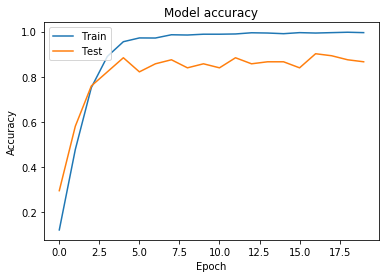

[0.8593098635918328, 0.8660714253073647]

In [150]:
#Fitting keras model, no test gen for now
#STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
#STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
#print("Step size as calculated: ", STEP_SIZE_TRAIN)
STEP_SIZE_TRAIN=60
STEP_SIZE_VALID=60
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20
)
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID
)

In [146]:
ls

sample_data/                       train_parus_caeruleus5.jpg
species_numbers.csv                train_parus_caeruleus6.jpg
train_aegithalos_caudatus10.jpg    train_parus_caeruleus7.jpg
train_aegithalos_caudatus2.jpg     train_parus_caeruleus8.jpg
train_aegithalos_caudatus3.jpg     train_parus_caeruleus9.jpg
train_aegithalos_caudatus4.jpg     train_parus_caeruleus.jpg
train_aegithalos_caudatus5.jpg     train_parus_major10.jpg
train_aegithalos_caudatus6.jpg     train_parus_major2.jpg
train_aegithalos_caudatus7.jpg     train_parus_major3.jpg
train_aegithalos_caudatus8.jpg     train_parus_major4.jpg
train_aegithalos_caudatus9.jpg     train_parus_major5.jpg
train_aegithalos_caudatus.jpg      train_parus_major6.jpg
train_alauda_arvensis10.jpg        train_parus_major7.jpg
train_alauda_arvensis2.jpg         train_parus_major8.jpg
train_alauda_arvensis3.jpg         train_parus_major9.jpg
train_alauda_arvensis4.jpg         train_parus_major.jpg
train_alauda_arvensis5.jpg         train_parus_pa